In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC

In [2]:
data_train=pd.read_csv('train.csv')
target=data.loc[:,'Survived']
data=data.iloc[:,2:]
data_test=pd.read_csv('test.csv')

In [159]:
data_test_=data_test.copy()
data1=pd.get_dummies(data_test_.loc[:,'Sex'])
data2=pd.get_dummies(data_test_.loc[:,'Pclass'])
data2.columns=['Pclass_1','Pclass_2','Pclass_3']#哑变量处理
data_2=pd.concat([data1,data2],axis=1)
data_2['age']=data_test_.loc[:,'Age']
data_2['SibSp'],data_2['Parch']=data_test_.loc[:,'SibSp'],data_test_.loc[:,'Parch']
data_2.loc[:,'age'].fillna(data_2.loc[:,'age'].agg('mean'),inplace=True)

In [18]:
data_train_=data_train.copy()
data1=pd.get_dummies(data_train_.loc[:,'Sex'])
data2=pd.get_dummies(data_train_.loc[:,'Pclass'])
data2.columns=['Pclass_1','Pclass_2','Pclass_3']#哑变量处理
data_1=pd.concat([data1,data2],axis=1)
data_1['age']=data_.loc[:,'Age']
data_1['SibSp'],data_1['Parch']=data_.loc[:,'SibSp'],data_.loc[:,'Parch']
data_1.loc[:,'age'].fillna(data_1.loc[:,'age'].agg('mean'),inplace=True)

In [163]:
data_2

,female,male,Pclass_1,Pclass_2,Pclass_3,age,SibSp,Parch
0,0,1,0,0,1,34.50000,0,0
1,1,0,0,0,1,47.00000,1,0
2,0,1,0,1,0,62.00000,0,0
3,0,1,0,0,1,27.00000,0,0
4,1,0,0,0,1,22.00000,1,1
...,...,...,...,...,...,...,...,...
413,0,1,0,0,1,30.27259,0,0
414,1,0,1,0,0,39.00000,0,0
415,0,1,0,0,1,38.50000,0,0
416,0,1,0,0,1,30.27259,0,0


In [48]:
from sklearn.model_selection import train_test_split as tts
Xtrain,Xtest,Ytrain,Ytest=tts(data_1,target,test_size=0.3,random_state=420)

In [54]:
clf=RFC(n_estimators=100)
clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

130 0.8246268656716418


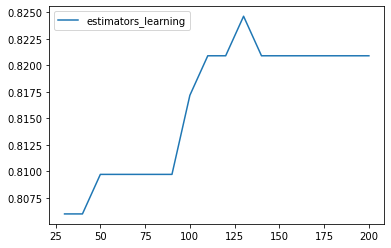

In [68]:
score=[]
#画出学习曲线
for i in range(30,201,10):
    clf=RFC(n_estimators=i,criterion='entropy',random_state=420)
    clf.fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print([*range(30,201,10)][score.index(max(score))],max(score))
plt.figure()
plt.plot(range(30,201,10),score,label='estimators_learning')
plt.legend()
plt.show()

130 0.8246268656716418


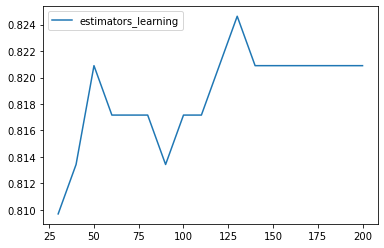

In [67]:
score=[]
#画出学习曲线
for i in range(30,201,10):
    clf=RFC(n_estimators=i,criterion='gini',random_state=420)
    clf.fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print([*range(30,201,10)][score.index(max(score))],max(score))
plt.figure()
plt.plot(range(30,201,10),score,label='estimators_learning')
plt.legend()
plt.show()

122 0.8246268656716418


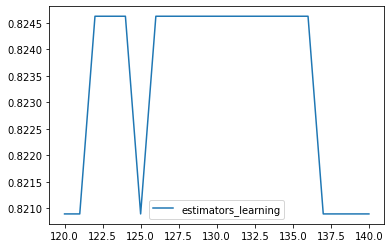

In [70]:
#选择gini 
score=[]
#画出学习曲线
for i in range(120,141):
    clf=RFC(n_estimators=i,criterion='gini',random_state=420)
    clf.fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print([*range(120,141)][score.index(max(score))],max(score))
plt.figure()
plt.plot(range(120,141),score,label='estimators_learning')
plt.legend()
plt.show()

In [73]:
#RFC {n_estimators:122,score:82.46}

5 0.8395522388059702


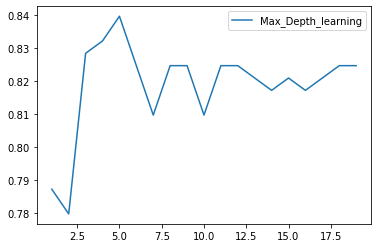

In [137]:
score=[]
#画出学习曲线
for i in range(1,20):
    clf=RFC(n_estimators=122,criterion='gini',random_state=420,max_depth=i)
    clf.fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print([*range(1,20)][score.index(max(score))],max(score))
plt.figure()
plt.plot(range(1,20),score,label='Max_Depth_learning')
plt.legend()
plt.show()

In [ ]:
#RFC {n_estimators:122,max_depth=5.score:83.96}

In [164]:
result=clf.predict(data_2)


In [106]:
from xgboost import XGBClassifier as XGBR
X=data_1.copy()
y=target
Xtrain,Xtest,Ytrain,Ytest=tts(X,y,test_size=0.3,random_state=420)
# data_xbg=xgb.DMatrix(X,y)

In [107]:
from sklearn.model_selection import GridSearchCV as GSCV

In [147]:
eta=np.linspace(0.01,0.2,10)#eta的调整范围[0.01,0.2]
num_round=np.linspace(2,10,9)#即n_estimators
num_round=[int(i) for i in num_round]#将浮点转换为整型
param_grid={'eta':eta,'n_estimators':num_round}


In [148]:
#网格搜索找出最优的eta和n_estimators组合
clf2=GSCV(XGBR(),param_grid,cv=10)
clf2.fit(Xtrain,Ytrain)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'eta': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [149]:
print(clf2.best_params_)
print(clf2.score(Xtest,Ytest))

{'eta': 0.052222222222222225, 'n_estimators': 7}
0.8171641791044776


In [ ]:
#XGB{n_estimators:7,eta:0.05222222,score:81.72}

[19:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimtors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimtors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimtors" } might not be used.

  This c

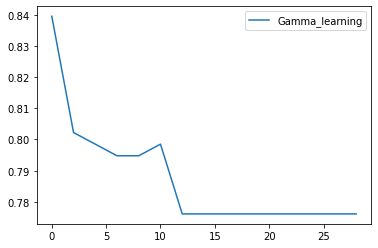

In [153]:
#学习曲线调节gamma
score=[]
for i in range(0,30,2):
    clf2=XGBR(n_estimtors=7,eta=0.052222,gamma=i)
    clf2.fit(Xtrain,Ytrain)
    score.append(clf2.score(Xtest,Ytest))
print([*range(0,30,2)][score.index(max(score))],max(score))
plt.figure()
plt.plot(range(0,30,2),score,label='Gamma_learning')
plt.legend()
plt.show()

In [154]:
#XGB {n_estimators:7,eta:0.05222222,gamma:0,score:83.97}

[19:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimtors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimtors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimtors" } might not be used.

  This c


1.0526315789473684 0.8432835820895522


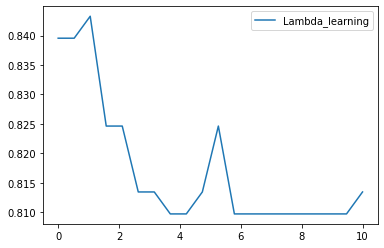

In [155]:
#学习曲线调节正则化参数lambda
score=[]
lambda_=np.linspace(0,10,20)
for i in lambda_:
    clf2=XGBR(n_estimtors=7,eta=0.052222,gamma=0,reg_lambda=i)
    clf2.fit(Xtrain,Ytrain)
    score.append(clf2.score(Xtest,Ytest))
print(lambda_[score.index(max(score))],max(score))
plt.figure()
plt.plot(lambda_,score,label='Lambda_learning')
plt.legend()
plt.show()

In [165]:
#XGB {n_estimators:7,eta:0.05222222,gamma:0,score:83.97,lambda:1.0526316,score:84.33}
result2=clf2.predict(data_2)